In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Loading the data

import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
import h5py

In [9]:
path ="/content/face_dataset.h5"

In [10]:
# LOad training and testing data

file = h5py.File(path ,'r+')
X_train = np.array(file['/training_set']).astype('uint8')
X_test = np.array(file['/testing_set']).astype('uint8')

In [12]:
print(f"Shape of training set: {X_train.shape}")
print(f"Shape of testing set: {X_test.shape}")

Shape of training set: (48, 10304)
Shape of testing set: (12, 10304)


In [16]:
def image_grid(D,H,W,cols=10,scale=1):
 """ display a grid of images
 H,W: Height and width of the images
 cols: number of columns = number of images in each row
 scale: 1 to fill screen
 """
 n = np.shape(D)[0]
 rows = int(math.ceil((n+0.0)/cols))
 fig = plt.figure(1,figsize=[scale*20.0/H*W,scale*20.0/cols*rows],dpi=300)
 for i in range(n):
    plt.subplot(rows,cols,i+1)
    fig=plt.imshow(np.reshape(D[i,:],[H,W]), cmap = plt.get_cmap("gray"))
    plt.axis('off')

In [18]:
H = 112
W = 92

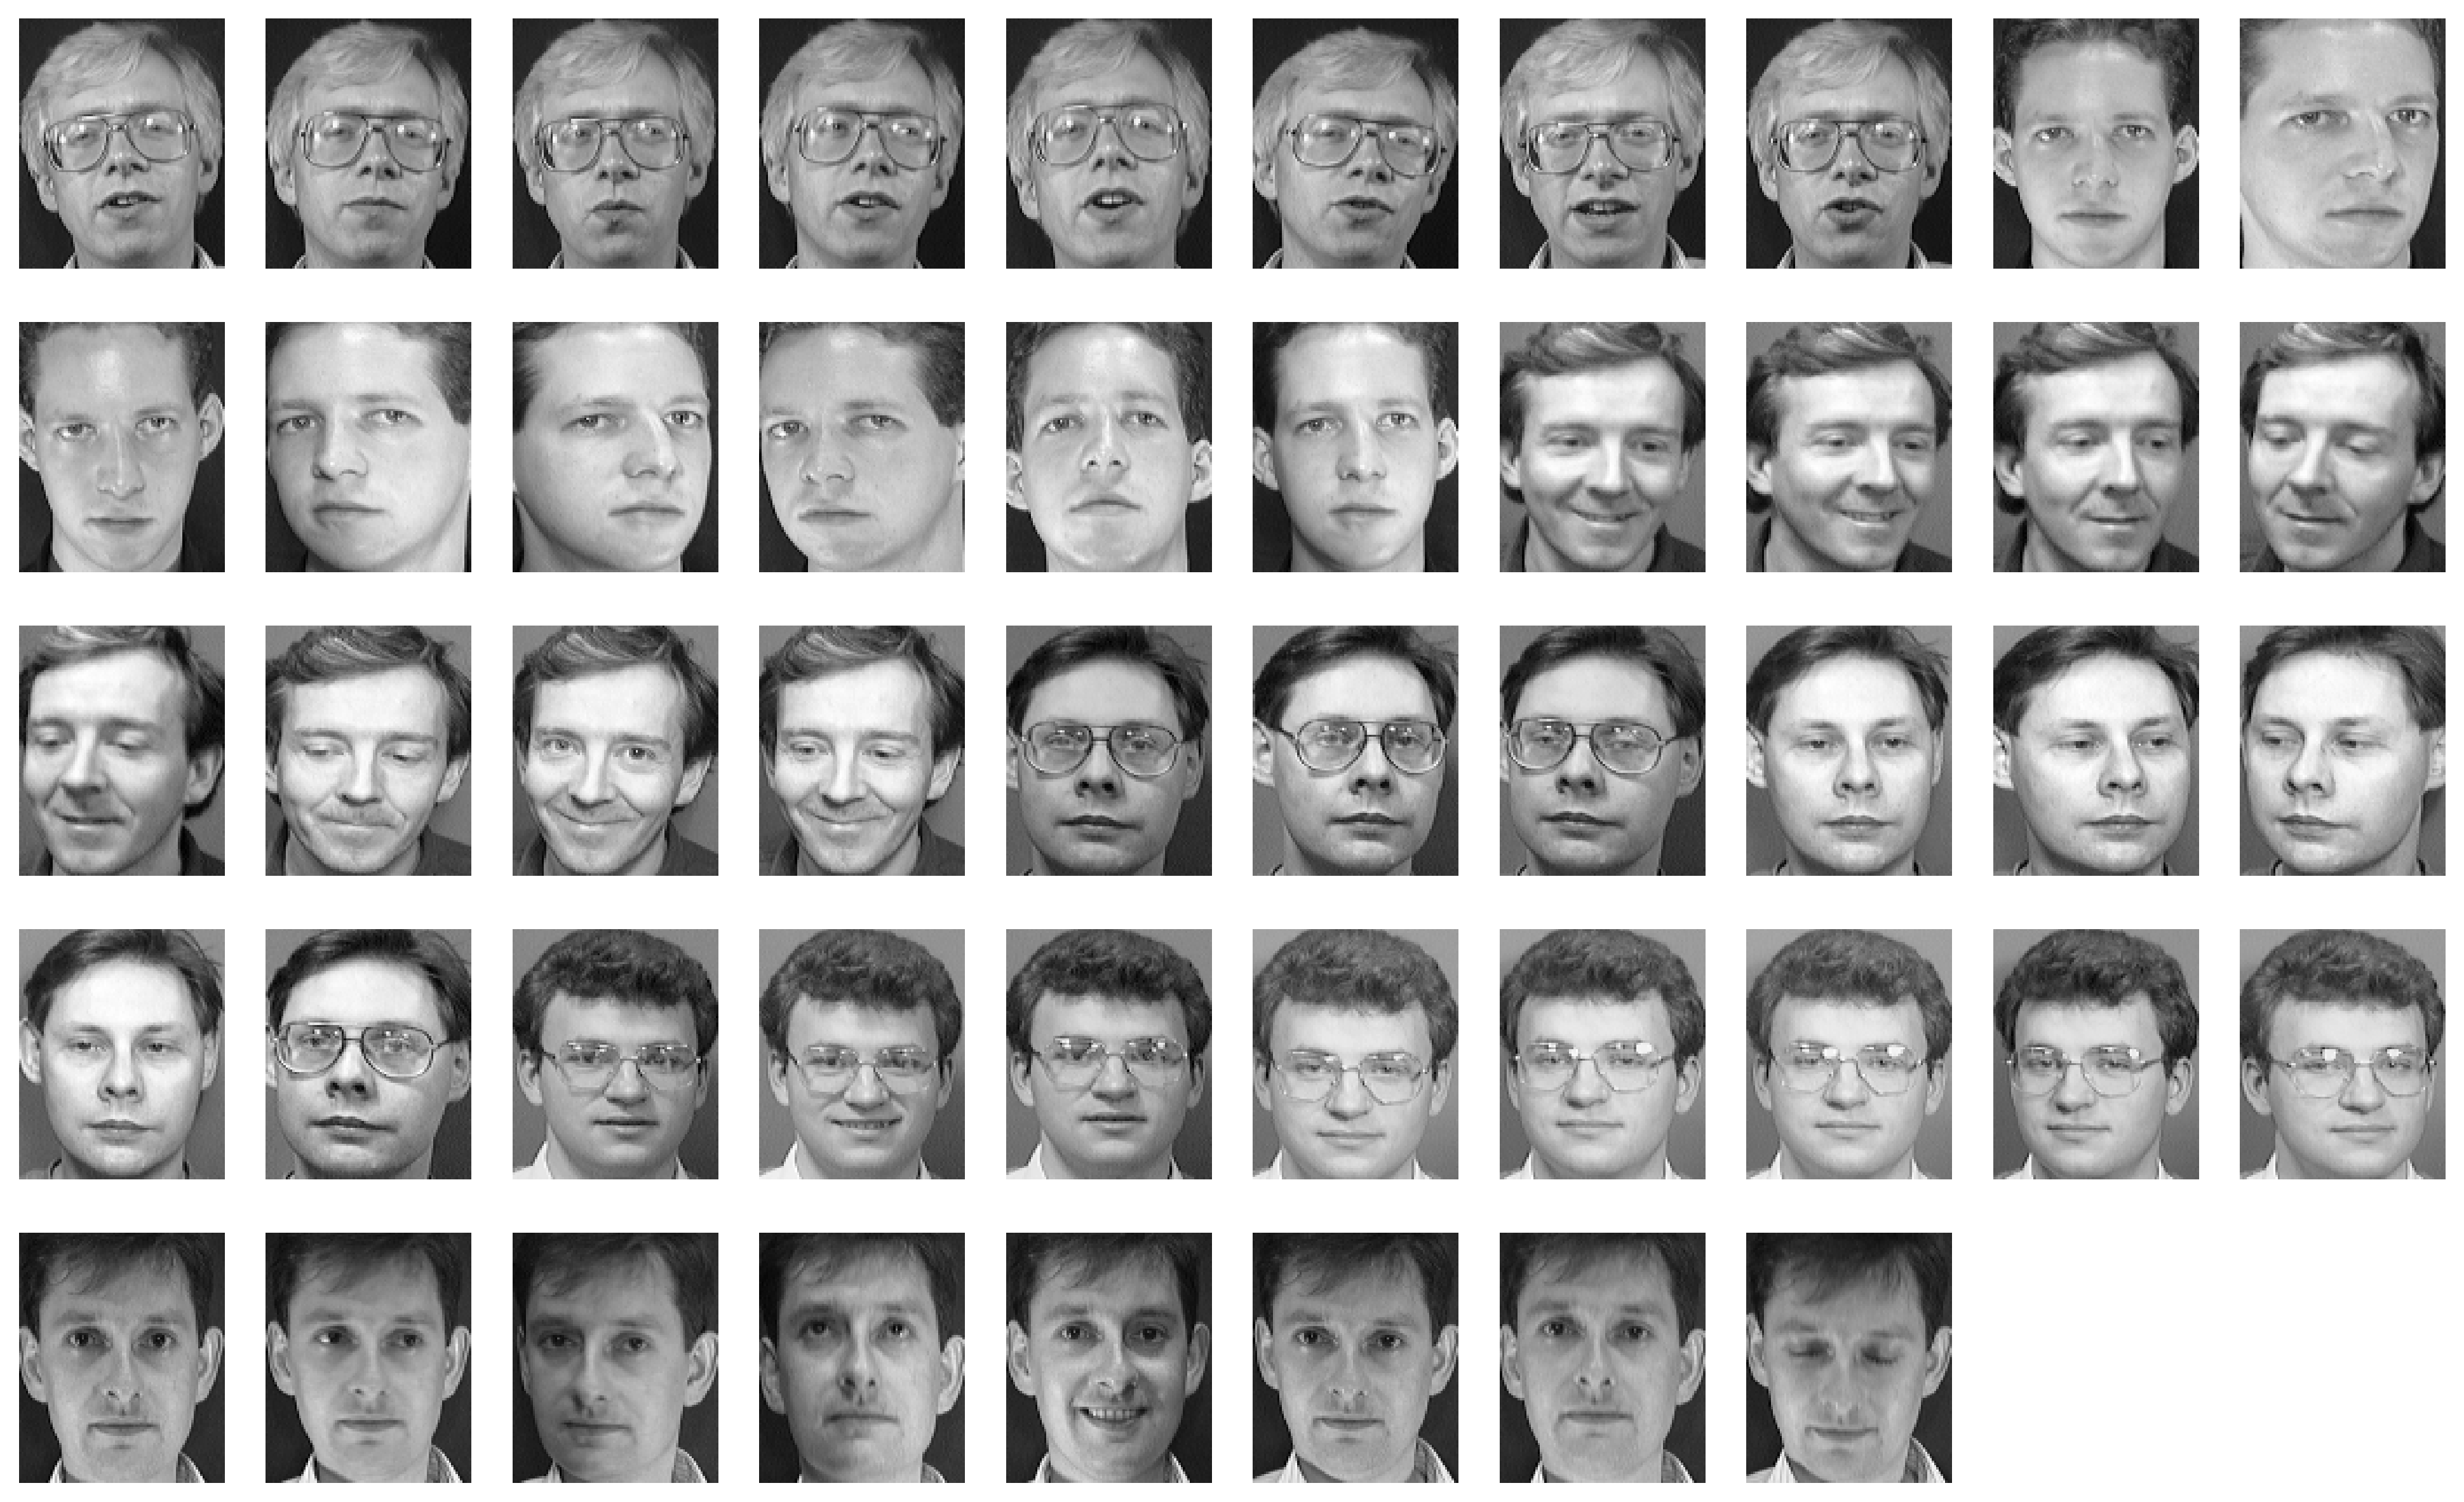

In [19]:
# Show training images

image_grid(X_train, H, W)
plt.show()

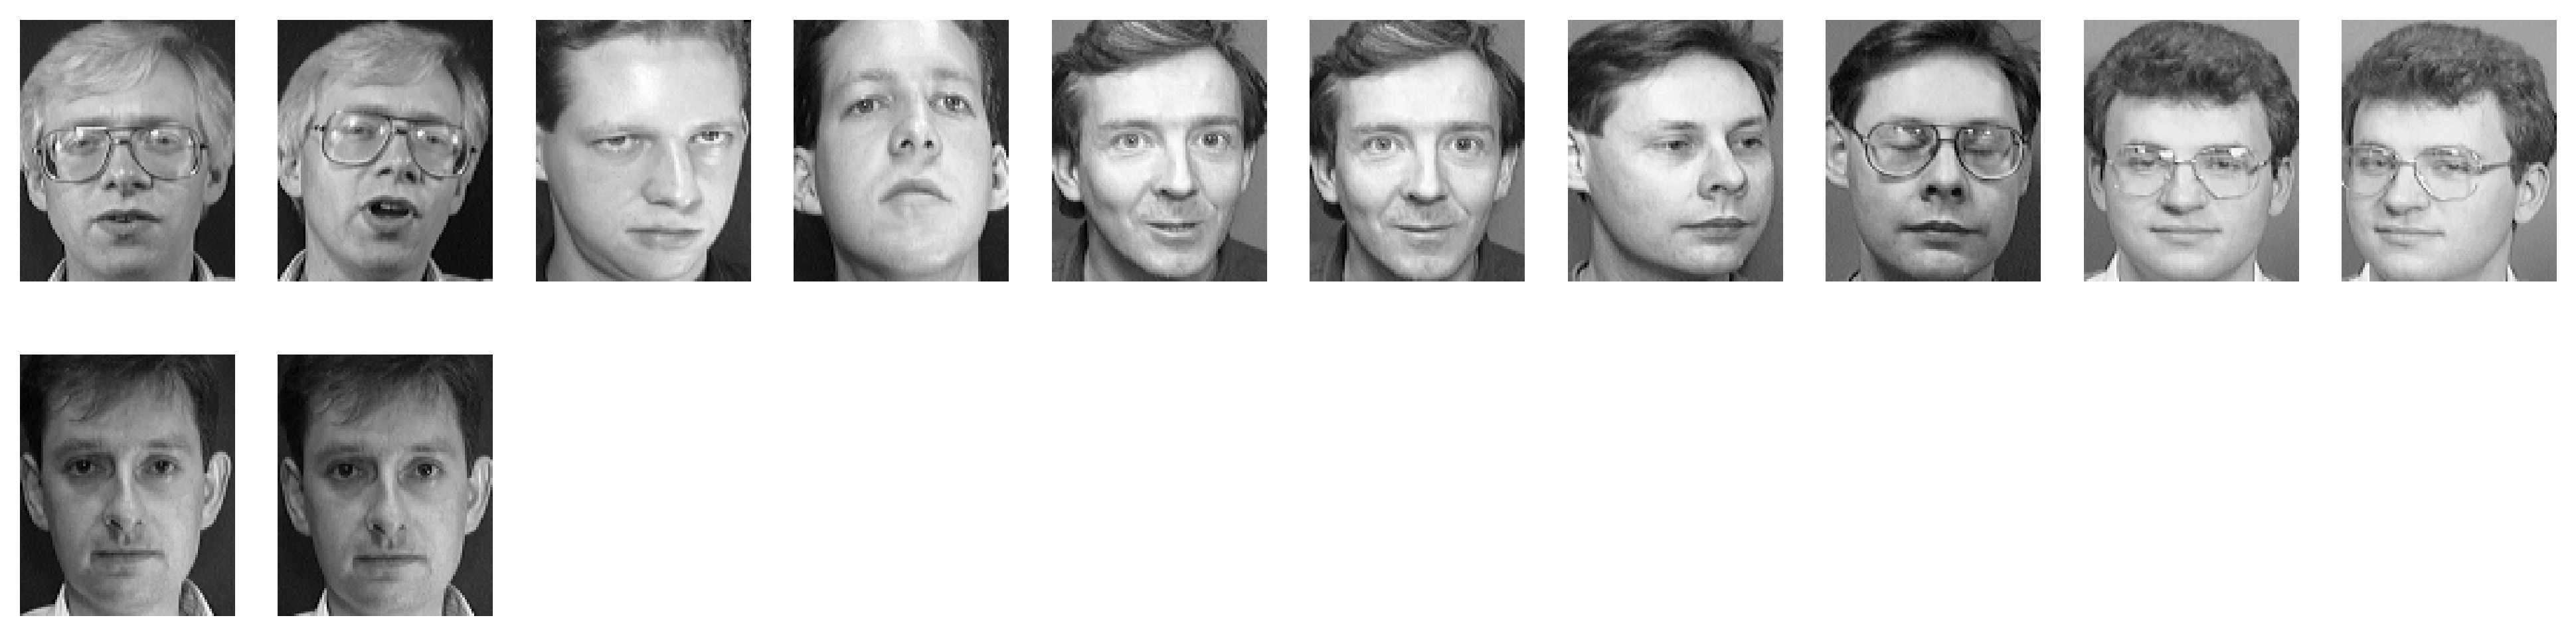

In [20]:
# Show testing images

image_grid(X_test,H,W)
plt.show()

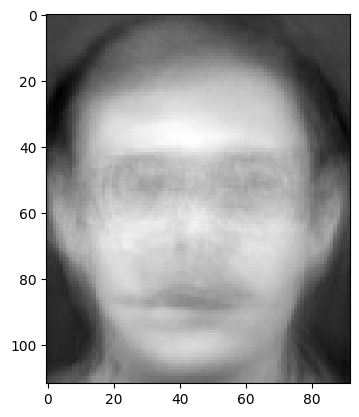

In [21]:
mean_image = np.mean(X_train, axis=0)
plt.imshow(np.reshape(mean_image,[H,W]), cmap = plt.get_cmap("gray"))
plt.show()

In [24]:
from sklearn.decomposition import PCA
n_components = 40
# Extracting the top 40 eigenfaces from the dataset

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

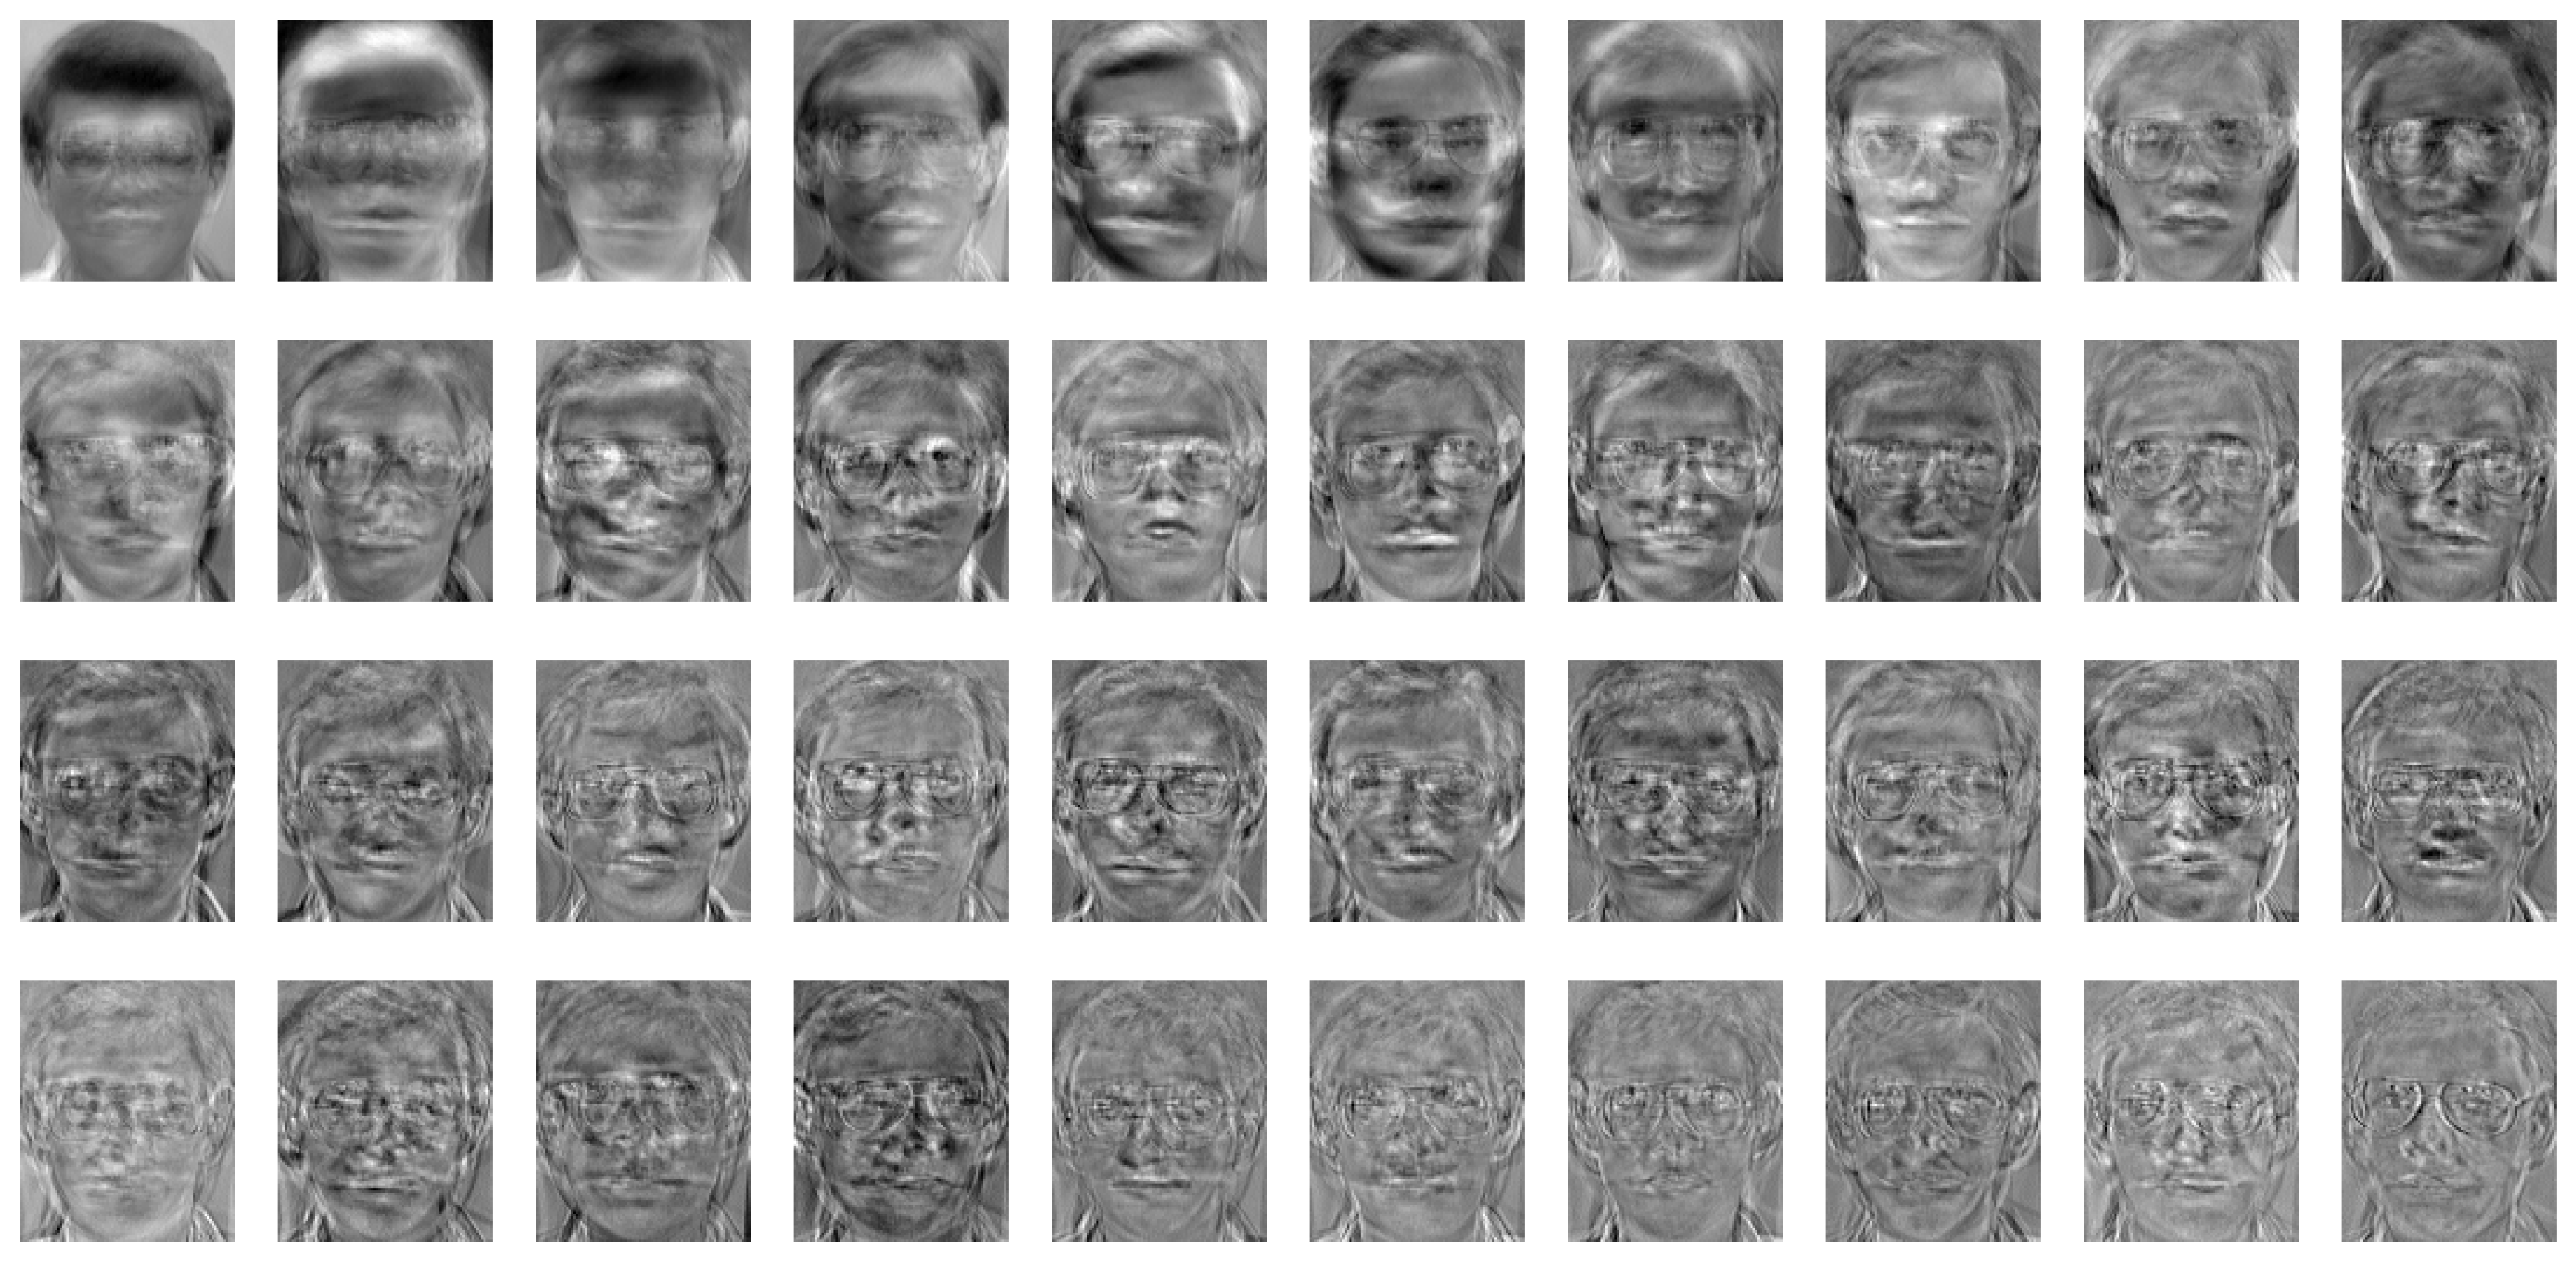

In [26]:
# Showing the eigenfaces
eigenfaces = pca.components_
image_grid(eigenfaces[:,:], H, W)
plt.show()

eigenfaces = eigenfaces.reshape((n_components, H, W))


In [27]:
# Projecting the input data on the eigenfaces orthonormal basis
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


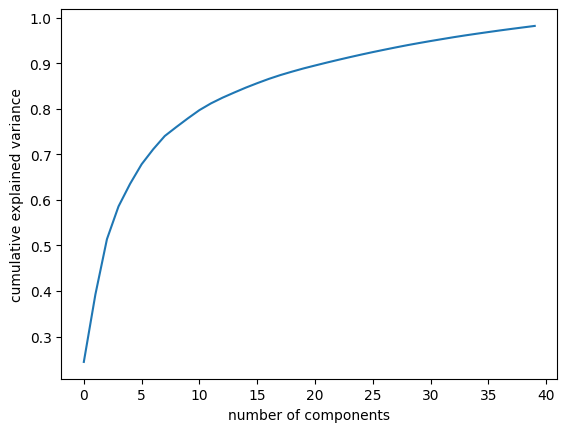

In [28]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()


In [29]:
# Calculate distances
intra_class_dist = np.sum(np.power((X_train_pca[1,:] - X_test_pca[1,:]),2))
inter_class_dist = np.sum(np.power((X_train_pca[1,:] - X_test_pca[6,:]),2))
print("Intra-class distance: %d" % (intra_class_dist))
print("Inter-class distance: %d" % (inter_class_dist))


Intra-class distance: 22
Inter-class distance: 46
